## Project: Wrangle and Analyze Data

In [61]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
plt.rcParams['figure.figsize']=(8,9)

### Gathering Dataset:
This project contain three dataset:

Twitter archive (csv file)
Image predictions for dogs(tsv file), download it programatically as a URL by  request library.
Twitter info which is on twitter servers encompassed in Twitter archieve , we will download it by Tweepy library.

In [31]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [32]:
# tsv file by using request library to download 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode="wb") as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
response

<Response [200]>

In [33]:
#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
   # for tweet_id in tweet_ids:
    #    count += 1
     #   print(str(count) + ": " + str(tweet_id))
      #  try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
         #   json.dump(tweet._json, outfile)
          #  outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [34]:
with open('tweet-json.txt') as json_f:
    json_tweet = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        json_tweet = json_tweet.append(data,ignore_index=True)
json_tweet.head()


,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing data 

#### Assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [35]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [36]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
2222,668466899341221888,NaN,NaN,2015-11-22 16:31:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a mother dog caring for her pups. Snaz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668466899...,4,10,a,None,None,None,None
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,None,None,None,None
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,None,None,None,None
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13,10,Eli,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,None,None,None,None
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo,None,None,None


In [37]:
image_predictions.info()
image_predictions.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
605,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,EntleBucher,0.523206,True,Greater_Swiss_Mountain_dog,0.431657,True,Appenzeller,0.044208,True
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.430583,True,golden_retriever,0.263581,True,Great_Pyrenees,0.179385,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
2007,877736472329191424,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Chesapeake_Bay_retriever,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True
520,676533798876651520,https://pbs.twimg.com/media/CWOH4s9U8AEtkmQ.jpg,1,chow,0.265274,True,ice_bear,0.167614,False,fur_coat,0.117506,False
398,673680198160809984,https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True


In [38]:
json_tweet.info()
json_tweet.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


,tweet_id,favorites,retweets
10,890006608113172480,31166,7624
193,855245323840757760,0,6568
95,873580283840344065,24837,4143
1563,688064179421470721,1878,408
144,863553081350529029,15935,4489
1264,709852847387627521,3824,1336
2099,670691627984359425,632,266
179,857062103051644929,0,183
2309,666781792255496192,404,211
107,871515927908634625,20730,3628


### Quality issues 

##### For twitter_archive dataset 



1. Dogs names are not correct there are names like 'a', 'this' and 'none' *

2. since the tweet id will not be used in the calculation it should be a string rather than integer*

3. for the both rating it should be converted to float rather than int *

4.  timestamp data type should be DateTime instead *

5. Capitalize the first letter in the name*

6. Change the source instead of links to words to be more readable *
##### For image_predictions

7. since the tweet id will not be used in the calculation it should be a string rather than integer *
##### For json_tweet

8. the favorites and retweets columns should be converted to int datatype *

### Tidness issues

1. the doge types are in separated columns we have to merge it in one column called dog_types *

2. matching the data in twitter_archive dataset and tweet-JSON because the data is sorted in separated tables*

### Cleaning 

First i will make a copies for the files so i can work on the copy



In [39]:
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
json_tweet_clean= json_tweet.copy()


In [40]:
#Define1 1
#merge json_tweet table with twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, json_tweet_clean, on = 'tweet_id', how = 'inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'inner')

twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'], keep=False)]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [41]:
#Define 2
#convert timestamp to datetime


#code
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# new columns ceated

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#Test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'year',
 'month',
 'day']

In [42]:
## Define 3
#Change the columns name for to make it readable 'p1', 'p2', 'p3' , 'p1_conf', 'p2_conf' and 'p3_conf'


##code
# change the column names
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)


## Test
image_predictions.head()


,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
### Define 4
#Show the inccorected names of dog then put it as "None" rows.


##code
twitter_archive_clean.name.sort_values()

#check for the names to find the incorrected ones
twitter_archive_clean['name'].value_counts().head(40)


None       577
a           55
Charlie     11
Tucker      10
Penny       10
Cooper      10
Oliver      10
Lucy        10
Bo           8
Winston      8
Lola         8
Sadie        8
an           7
Toby         7
the          7
Daisy        7
Dave         6
Jax          6
Milo         6
Rusty        6
Bailey       6
Stanley      6
Scout        6
Bella        6
Koda         6
Oscar        5
Larry        5
Chester      5
Leo          5
Buddy        5
Louis        5
Alfie        5
Sunny        4
one          4
Ruby         4
Walter       4
just         4
Brody        4
Finn         4
Jack         4
Name: name, dtype: int64

In [44]:
##Test
inco_names_list = ['a','the', 'very','an']
for i in inco_names_list:
          twitter_archive_clean['name'].replace(i, 'None', inplace=True)
        
twitter_archive_clean['name'].value_counts()

None        650
Charlie      11
Tucker       10
Penny        10
Oliver       10
           ... 
Liam          1
Dante         1
Shawwn        1
Terrance      1
Siba          1
Name: name, Length: 932, dtype: int64

In [45]:
## Define 5
#the favorites and retweets columns should be converted to int datatype

##code
twitter_archive_clean.favorites = twitter_archive_clean.favorites.astype('int')
twitter_archive_clean.retweets = twitter_archive_clean.retweets.astype('int')

#Test
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source                      2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   rating_numerator            2073 non-null   int64  
 10  rating_denominator          2073 non-null   int64  
 11  name                        2073 non-null   object 
 12  doggo                       2073 non-null   object 
 13  floofer                     2073 

In [46]:
#Define 6
## change the tweet_id from int to str

#code
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)


#Test

twitter_archive_clean['tweet_id'].dtypes



dtype('O')

In [47]:
#Define 7

#drop useless columns

#code
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#Test

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   object 
 1   source              2073 non-null   object 
 2   text                2073 non-null   object 
 3   expanded_urls       2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   doggo               2073 non-null   object 
 8   floofer             2073 non-null   object 
 9   pupper              2073 non-null   object 
 10  puppo               2073 non-null   object 
 11  favorites           2073 non-null   int32  
 12  retweets            2073 non-null   int32  
 13  jpg_url             2073 non-null   object 
 14  img_num             2073 non-null   int64  
 15  p1                  2073 non-null   object 
 16  p1_con

In [48]:
# Define 8
#the doge types are in separated columns we have to merge it in one column called dog_types 

##code
twitter_archive_clean = pd.melt(twitter_archive_clean,
                        id_vars=['tweet_id', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator',
                                              'name','favorites', 'retweets', 'jpg_url', 'img_num', 'p1',
                                              'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog', 'year', 'month', 'day'], value_name='dog_types')
twitter_archive_clean = twitter_archive_clean.drop('variable', axis=1)
#Test
twitter_archive_clean['dog_types'].value_counts()

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_types, dtype: int64

In [49]:
#Define 9
 #Change the source instead of links to words to be more readable *

#code
twitter_archive_clean['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     8128
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      120
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      44
Name: source, dtype: int64

In [50]:
#code
## it will be category instaed of links 
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')                                                                         
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')               


#Test
twitter_archive_clean['source'].value_counts()



Twitter for iphone    8128
Twitter Web Client     120
TweetDeck               44
Name: source, dtype: int64

In [51]:
# Define 10
#Capitalize the first letter in the name

#code
twitter_archive_clean['name'].str.islower().sum()


108

In [52]:
## Code 
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

## Test
twitter_archive_clean['name'].str.islower().sum()



0

## Store data

In [53]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Visualization

In [54]:
twitter_archive_clean.sample(4)


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month,day,dog_types
4056,667534815156183040,Twitter Web Client,"This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,866,576,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,...,Cardigan,0.307407,True,cocker_spaniel,0.033158,True,2015,11,20,None
759,754747087846248448,Twitter for iphone,This is Keith. He's pursuing a more 2D lifesty...,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,2854,591,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,...,cash_machine,0.250837,False,sliding_door,0.117872,False,2016,7,17,None
3828,671744970634719232,Twitter for iphone,Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,6,10,None,1430,841,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,...,ram,0.213839,False,Arctic_fox,0.081551,False,2015,12,1,None
2502,808106460588765185,Twitter for iphone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,9701,2525,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,...,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,2016,12,12,None


## 1. The Distribution of Source

Twitter for iphone    330
TweetDeck               2
Twitter Web Client      1
Name: source, dtype: int64


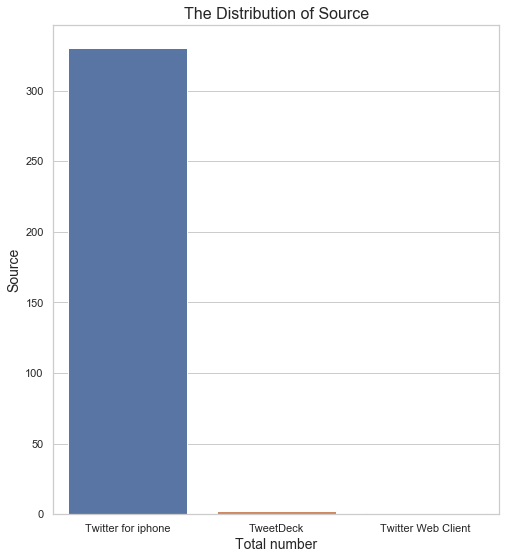

In [65]:


print(twitter_archive_clean['source'].value_counts());

sns.set(style="whitegrid")
sns.countplot(data = twitter_archive_clean, x = 'source')

plt.xlabel('Total number', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);




#### The plot above shows us the distribution of source. We can see that the commen source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the most commen used for people using to tweet, retweet,favorite and post. while the TweetDesk is rare to use.

## 2. which dog category have the highest favorites rate




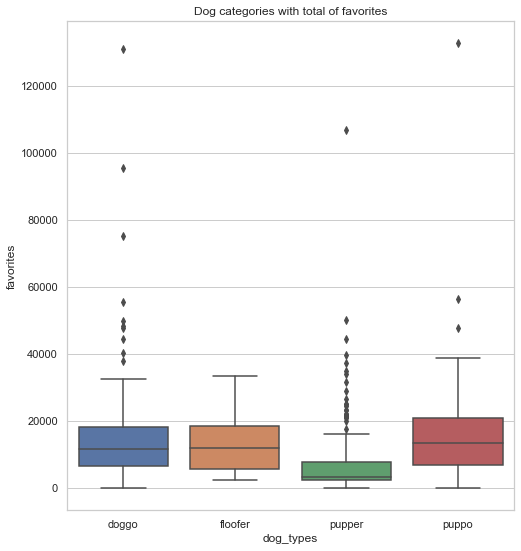

In [63]:
twitter_archive_clean.drop(twitter_archive_clean.query('(dog_types == "None")').index ,inplace=True)

sns.boxplot(x="dog_types", y="favorites", data=twitter_archive_clean).set_title('Dog categories with total of favorites');


#### As we can see,after removing None values from the dog_types and create the visiulaztion it is clear to us that puppo dog recorded the highest rate, then floofer,doggo, and pupper.

## 2. The corrlation between retweets and favorites


In [57]:
twitter_archive_clean.corr(method='pearson')


,rating_numerator,rating_denominator,favorites,retweets,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,year,month,day
rating_numerator,1.000000,NaN,0.346899,0.321134,0.180871,0.154346,0.242758,0.011156,0.213085,-0.075832,0.263590,0.426185,-0.090169,0.100219
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,0.346899,NaN,1.000000,0.837409,0.104383,0.022030,0.130031,0.016503,0.042200,-0.043490,0.063564,0.400780,-0.109625,0.070051
retweets,0.321134,NaN,0.837409,1.000000,0.095244,0.009818,0.088651,0.029959,0.001365,-0.035668,0.022766,0.285464,-0.104479,0.031424
img_num,0.180871,NaN,0.104383,0.095244,1.000000,0.208071,0.031385,-0.161122,0.091534,-0.133912,0.064945,0.159823,-0.043750,0.006072
p1_conf,0.154346,NaN,0.022030,0.009818,0.208071,1.000000,0.180009,-0.500945,0.164156,-0.710895,0.136266,0.040329,0.046854,0.003143
p1_dog,0.242758,NaN,0.130031,0.088651,0.031385,0.180009,1.000000,0.107414,0.625694,-0.032781,0.578573,0.159485,-0.042172,0.026082
p2_conf,0.011156,NaN,0.016503,0.029959,-0.161122,-0.500945,0.107414,1.000000,0.125332,0.461411,0.128866,0.069944,-0.030714,-0.005217
p2_dog,0.213085,NaN,0.042200,0.001365,0.091534,0.164156,0.625694,0.125332,1.000000,-0.048875,0.603987,0.117076,-0.002736,-0.022243
p3_conf,-0.075832,NaN,-0.043490,-0.035668,-0.133912,-0.710895,-0.032781,0.461411,-0.048875,1.000000,0.005893,-0.035854,-0.025357,0.037220


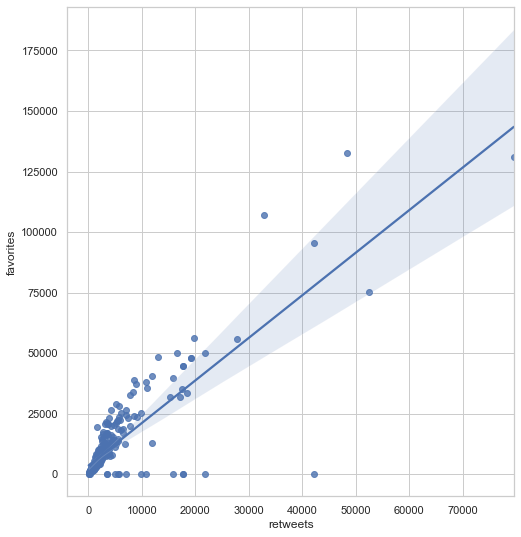

In [64]:

sns.regplot(x='retweets', y='favorites', data=twitter_archive_clean);


#### the most popular tweets usually get a large number of retweets and favorite. As we can see that i have test the corrlation between them and it was 0.837409, this is a high value showing a strong positive relationship between  retweets and favorite